<a href="https://colab.research.google.com/github/Munikumarnm/ABC-Classification/blob/main/Inventory_Classification_in_3_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step-1: Import the packages & Dataset

In [ ]:
# Let's import the packages required for the analysis
import pandas as pd # Pandas used for Data analysis, Data importing, exporting etc
import numpy as np  # NumPy is used for mathematical operatons  
import seaborn as sns
!pip install inventorize3  # Install this package since it is not available in colab
import inventorize3 as inv  # import the inventorize3 
#Dataset link: kaggle datasets download -d carrie1/ecommerce-data

In [ ]:
# import the data
raw_data= pd.read_csv("/content/drive/MyDrive/archive.zip",encoding='unicode_escape') 
# Please change the path of the file while exeuting in your system
# encoding is used to ingonre the special charecters in the data

# Step2: Data Cleaning & Preprocessing

In [ ]:
# Will check how data looks like
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Dimesnsion of the data
raw_data.shape

(541909, 8)

In [ ]:
# Let us check the types of the columns
raw_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
# Minimum & Max date in dataset
raw_data['InvoiceDate']= pd.to_datetime(raw_data['InvoiceDate'])
print(raw_data['InvoiceDate'].min(), raw_data['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


In [ ]:
# Lets clean the data
data= raw_data.drop_duplicates() # drop all the duplicate line items
data= data.dropna()              # drop all null value rows
data= data[data['Quantity']>0]   # Filter out rows where quantity sold is less than or equal to zero

In [ ]:
# lets check dimension
data.shape

(392732, 8)

In [ ]:
# Lets consider only required columns
data1= data[['StockCode','Description','Quantity','UnitPrice']]

In [ ]:
# Add new column as revenue
data1['revenue']=data1['Quantity']*data1['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1.head()

In [ ]:
# Lets summarize the data for SKU's ( Per SKU Total Quantity & Total Revenue)
data2= data1.groupby(['StockCode','Description']).agg(Volume=('Quantity',np.sum),Revenue=('revenue',np.sum)).reset_index()

In [ ]:
data2.head()

#Step-3: Inventory classifcation bassis Sales Volume

In [ ]:
# Lets classify the products to A B & C categories
data_abc= inv.ABC(data2[['StockCode','Volume']])

In [ ]:
# Lets check the classification
data_abc.head(5)

,StockCode,Volume,Percentage,comulative,Category
2602,23843,80995,0.015679,0.015679,A
2100,23166,77916,0.015083,0.030762,A
3020,84077,54319,0.010515,0.041277,A
3444,85099B,46078,0.008920,0.050196,A
3459,85123A,36706,0.007105,0.057302,A


In [ ]:
# let us check the count of Categories
data_abc.Category.value_counts()

C    2143
A     879
B     875
Name: Category, dtype: int64

In [ ]:
# What is the Sales volume share of A, B & C class products
data_summary= data_abc.groupby('Category').agg(Count=('Category',np.count_nonzero),Volume_share=('Percentage',np.sum)).reset_index()
data_summary['Volume_share']= data_summary['Volume_share']*100
data_summary

,Category,Count,Volume_share
0,A,879,79.996597
1,B,875,15.000989
2,C,2143,5.002414


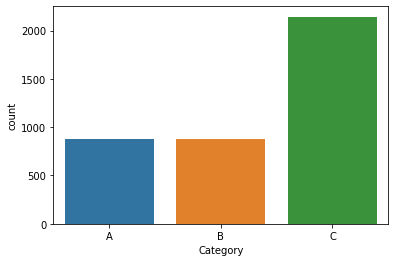

In [ ]:
# Lets plot the graph for count of Categories A, B, C
sns.countplot(x='Category',data=data_abc, label=True )

In [51]:
# Lets export the classified inventory data to the CSV
data_abc.to_csv('/content/drive/MyDrive/classified_data.csv')